# EnergyScope Symposium Library Demo

Demonstration of the EnergyScope library  
1st EnergyScope Symposium  
3rd October 2024, ETH Zürich  

## Install EnergyScope

In [1]:
#%pip install energyscope

## Load libraries (initialisation)

In [2]:
import pandas as pd

from energyscope.energyscope import Energyscope
from energyscope.models import infrastructure_ch_2050, infrastructure_qc_2020
from energyscope.plots import plot_sankey, plot_parametrisation, plot_comparison
from energyscope.result import postprocessing


## Select and Load Model

In [3]:
es_model_ch = Energyscope(model=infrastructure_ch_2050)
es_model_qc = Energyscope(model=infrastructure_qc_2020)

## Single optimization

In [4]:
# Solve the models
results_ch = es_model_ch.calc()
results_qc = es_model_qc.calc()
# Postcompute KPIs
KPI_ch = postprocessing(results_ch)
KPI_qc = postprocessing(results_qc)

Gurobi 11.0.0:Gurobi 11.0.0: optimal solution; objective 8151.373244
6079 simplex iteration(s)
1 branching node(s)
absmipgap=0.102405, relmipgap=1.25629e-05
Gurobi 11.0.0:Gurobi 11.0.0: optimal solution; objective 23154.07143
27950 simplex iteration(s)
1 branching node(s)


### Sankey diagram

In [5]:
 # Generate the Sankey diagram using the processed results
fig_ch = plot_sankey(KPI_ch)
fig_qc = plot_sankey(KPI_qc)

# Display the generated Sankey diagram in the output
fig_ch.show()
fig_qc.show()


## Multirun

In [6]:
from energyscope.datasets import parametrize_params

params = [
    {'param': 'f_min', 'min_val': 0, 'max_val': 50, 'index0': 'PV_LV'},
    {'param': 'f_max', 'min_val': 0, 'max_val': 50, 'index0': 'PV_LV'}
]

seq_data = parametrize_params(params=params, n_steps=6)
display(seq_data)

,param,index0,index1,index2,index3,value1,value2,value3,value4,value5,value6
0,f_min,PV_LV,None,None,None,0.0,10.0,20.0,30.0,40.0,50.0
1,f_max,PV_LV,None,None,None,0.0,10.0,20.0,30.0,40.0,50.0


In [7]:


# Run n optimizations based on parameter changed in seq_data
results_ch_n = es_model_ch.calc_sequence(seq_data)
# Postcompute KPIs
KPI_ch_n = postprocessing(results_ch_n)

Gurobi 11.0.0:Gurobi 11.0.0: optimal solution; objective 8151.373244
6079 simplex iteration(s)
1 branching node(s)
absmipgap=0.102405, relmipgap=1.25629e-05
Gurobi 11.0.0:Gurobi 11.0.0: optimal solution; objective 8151.373244
9276 simplex iteration(s)
1 branching node(s)
absmipgap=0.102405, relmipgap=1.25629e-05
1
Gurobi 11.0.0:Gurobi 11.0.0: optimal solution; objective 8288.992921
5751 simplex iteration(s)
1 branching node(s)
absmipgap=0.0912245, relmipgap=1.10055e-05
2
Gurobi 11.0.0:Gurobi 11.0.0: optimal solution; objective 8475.459734
7912 simplex iteration(s)
1 branching node(s)
absmipgap=0.182905, relmipgap=2.15806e-05
3
Gurobi 11.0.0:Gurobi 11.0.0: optimal solution; objective 8708.840712
5571 simplex iteration(s)
1 branching node(s)
absmipgap=0.122101, relmipgap=1.40204e-05
4
Gurobi 11.0.0:Gurobi 11.0.0: optimal solution; objective 9007.6033
6492 simplex iteration(s)
1 branching node(s)
absmipgap=0.14857, relmipgap=1.64939e-05
5
Gurobi 11.0.0:Gurobi 11.0.0: optimal solution; obj

In [8]:
# Generate the Sankey diagram using the processed results
fig1 = plot_sankey(KPI_ch_n, run_id=1)
fig2 = plot_sankey(KPI_ch_n, run_id=5)

# Display the generated Sankey diagram in the output
fig1.show()
fig2.show()

# Save the generated Sankey diagram as an HTML file
fig1.write_html("Sankey_results_ch_1.html")


In [9]:
# Select which results you want to display from the postprocessing dataframe df_annual and which aggregation you want (Category,Category_n, Sector)
plot_parametrisation(results=KPI_ch_n, variable="Annual_Prod", category="Sector").show()


In [10]:
plot_comparison(results=results_ch_n, variable='C_inv_an', category='Sector', run1=1, run2=5,
                labels={'C_inv_an': 'Annual Investment Costs'}).show()

plot_comparison(results=results_ch_n, variable='Annual_Prod', category='Category_2', run1=1, run2=5,
                labels={'Annual_Prod': 'Annual Production [GWh]'}).show()


## Uncertainty calculation

### Parameter definition 

In [11]:
from energyscope.datasets import gen_sobol_sequence
import numpy as np

# Manual setting of the parameters
parameters = [
    {'name': 'NEW_HYDRO_DAM', 'lower_bound': 0, 'upper_bound': 0.44},
    {'name': 'NEW_HYDRO_RIVER', 'lower_bound': 0, 'upper_bound': 0.85}
]

seq, prob = gen_sobol_sequence(parameters=parameters, trajectories=2)

df = pd.DataFrame(seq, columns=prob['names']).T
df.columns = ['value' + str(x) for x in list(df.columns) if not str(x) == "nan"]
df = df.reset_index(names=['index0'])
df['param'] = 'c_inv'

df['index1'] = np.nan
df['index2'] = np.nan
df['index3'] = np.nan
df

,index0,value0,value1,value2,value3,value4,value5,value6,value7,param,index1,index2,index3
0,NEW_HYDRO_DAM,0.041250,0.206250,0.041250,0.206250,0.261250,0.426250,0.261250,0.426250,c_inv,NaN,NaN,NaN
1,NEW_HYDRO_RIVER,0.398438,0.398438,0.557812,0.557812,0.823437,0.823437,0.132812,0.132812,c_inv,NaN,NaN,NaN


### Setup runs

In [12]:

results_ch_n = es_model_ch.calc_sequence(df)

Gurobi 11.0.0:Gurobi 11.0.0: optimal solution; objective 8151.373244
6079 simplex iteration(s)
1 branching node(s)
absmipgap=0.102405, relmipgap=1.25629e-05
Gurobi 11.0.0:Gurobi 11.0.0: optimal solution; objective 7965.253665
5982 simplex iteration(s)
1 branching node(s)
absmipgap=0.297329, relmipgap=3.73283e-05
1
Gurobi 11.0.0:Gurobi 11.0.0: optimal solution; objective 7965.256419
6165 simplex iteration(s)
1 branching node(s)
absmipgap=0.297481, relmipgap=3.73473e-05
2
Gurobi 11.0.0:Gurobi 11.0.0: optimal solution; objective 7965.258805
6383 simplex iteration(s)
1 branching node(s)
absmipgap=0.297329, relmipgap=3.73282e-05
3
Gurobi 11.0.0:Gurobi 11.0.0: optimal solution; objective 7965.26156
6812 simplex iteration(s)
1 branching node(s)
absmipgap=0.297329, relmipgap=3.73282e-05
4
Gurobi 11.0.0:Gurobi 11.0.0: optimal solution; objective 7965.271046
5369 simplex iteration(s)
1 branching node(s)
absmipgap=0.297329, relmipgap=3.73281e-05
5
Gurobi 11.0.0:Gurobi 11.0.0: optimal solution; ob

### Calculate KPIs

In [13]:
# Postcompute KPIs
KPI_ch_n = postprocessing(results_ch_n, df_monthly=True)

### Plot Parity

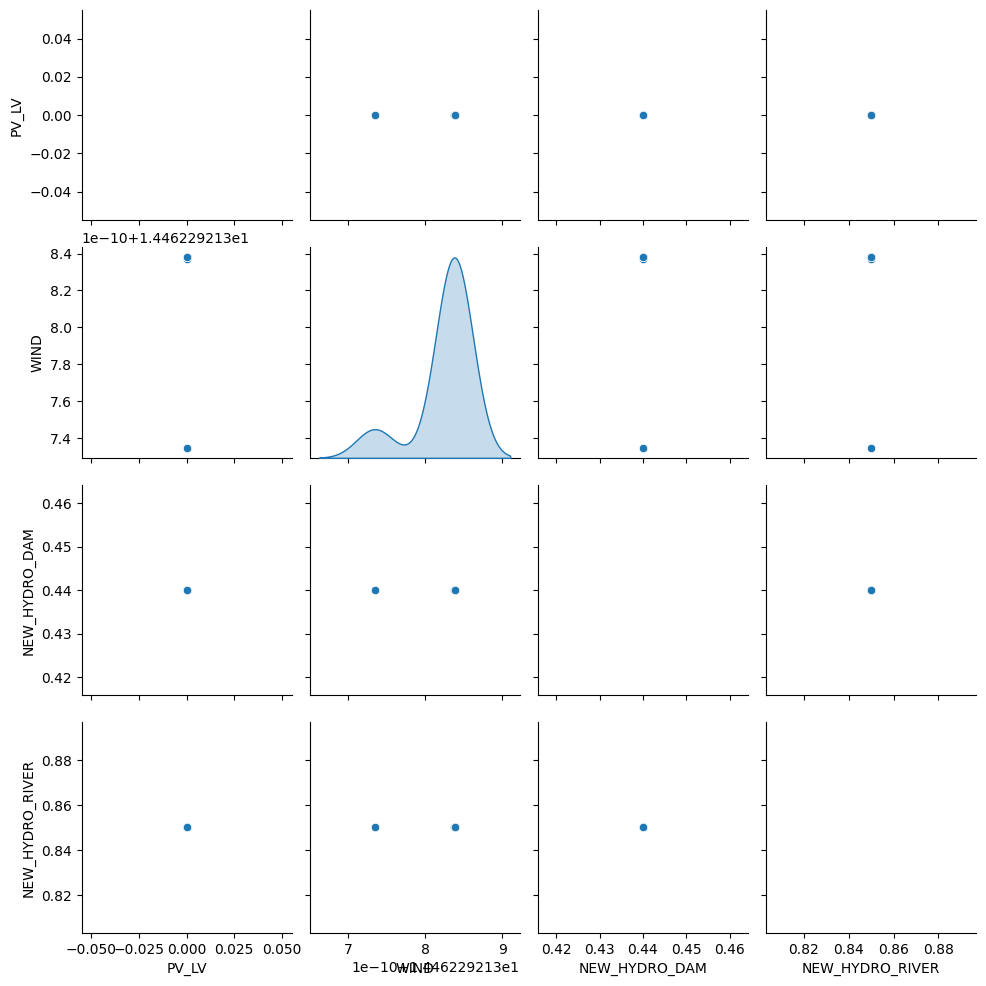

In [14]:
import seaborn as sns

df_annual = KPI_ch_n.postprocessing['df_annual']
df_annual = df_annual.loc[:, ['F_Mult']]
df_annual = df_annual.reset_index()

df_annual = pd.pivot_table(df_annual, values='F_Mult', index=['Run'], columns='level_0')
df_annual.sample(5)
cols = ['PV_LV', 'WIND', 'NEW_HYDRO_DAM', 'NEW_HYDRO_RIVER']
sns.pairplot(df_annual[cols].fillna(0)[cols], diag_kind="kde")